# 🧪 Naive Bayes Classifier on Breast Cancer Dataset

In this notebook, we will apply the **Naive Bayes algorithm** on the Breast Cancer dataset.  
We will go step by step:  
1. Import dataset  
2. Explore data  
3. Train-test split  
4. Standardization  
5. Train Naive Bayes  
6. Evaluate performance with metrics & plots  


## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

## 2. Load the Breast Cancer dataset

In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

# Show first rows
X.head()

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Explore dataset: class distribution

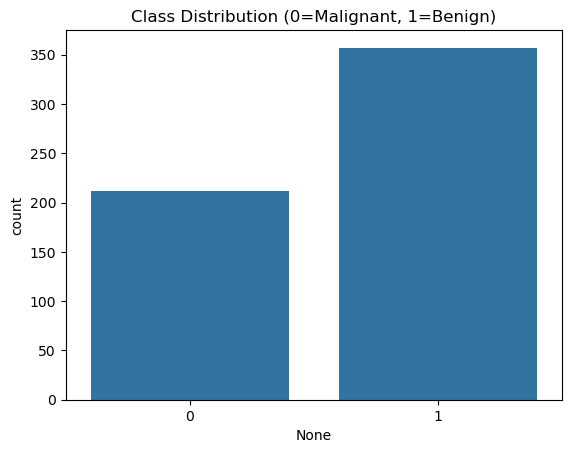

In [3]:
# Visualize class distribution
sns.countplot(x=y)
plt.title("Class Distribution (0=Malignant, 1=Benign)")
plt.show()

## 4. Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Standardize features

In [5]:
# Standardizing features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Train Gaussian Naive Bayes

In [6]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred = nb.predict(X_test_scaled)
y_prob = nb.predict_proba(X_test_scaled)[:, 1]

## 7. Model Evaluation: Accuracy & Report

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9298245614035088

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



## 8. Confusion Matrix

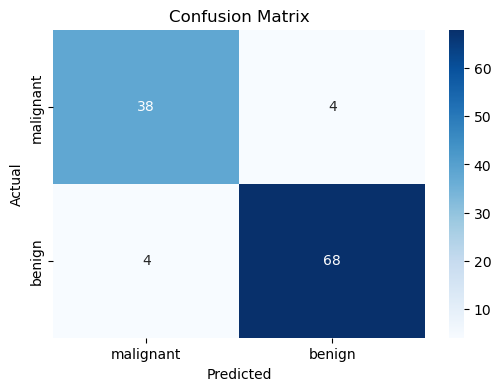

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 9. ROC Curve & AUC

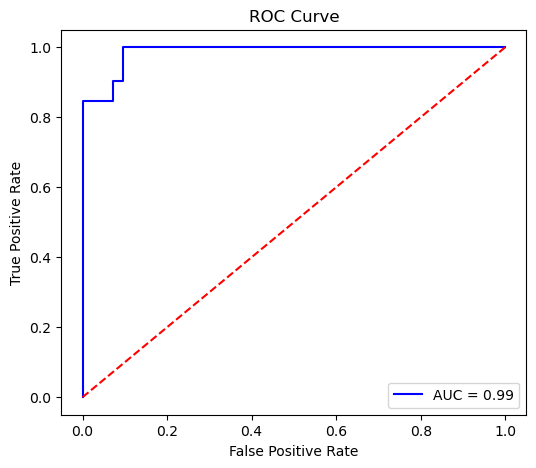

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## 10. Precision-Recall Curve

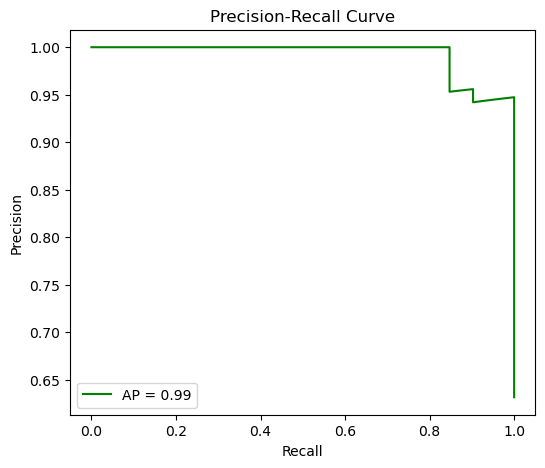

In [10]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {ap:.2f}", color="green")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## 11. Actual vs Predicted (Line Plot)

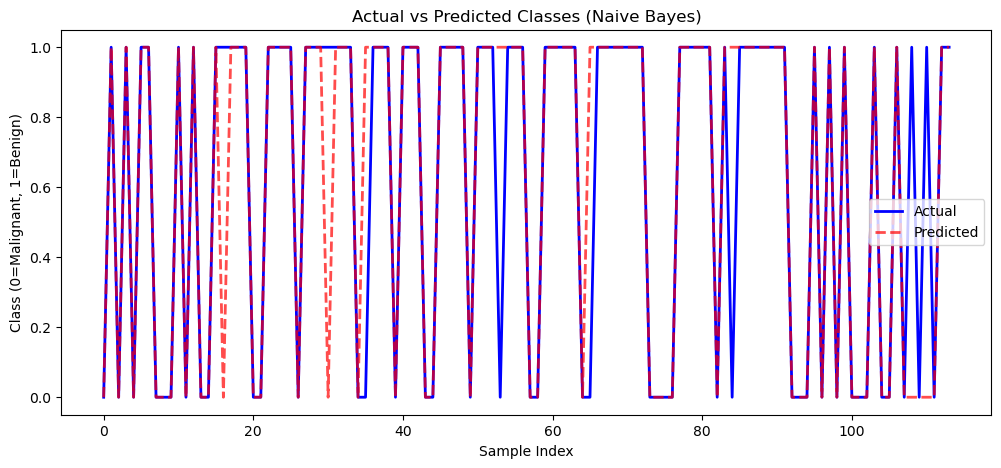

In [11]:
comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred}).reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(comparison.index, comparison["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(comparison.index, comparison["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Naive Bayes)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()

## 12. Scatter Plot: Actual vs Predicted

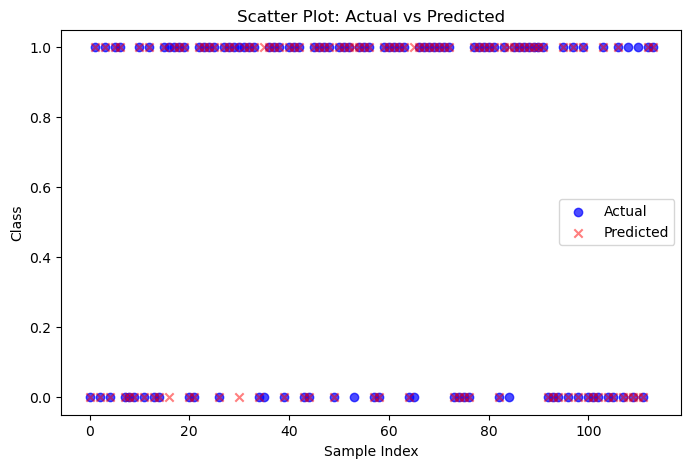

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(comparison.index, comparison["Actual"], label="Actual", alpha=0.7, color="blue")
plt.scatter(comparison.index, comparison["Predicted"], label="Predicted", alpha=0.5, color="red", marker="x")
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.legend()
plt.show()